# Introduction

I will use this script to clean the dataset and produce a new, normalized version, which we will use in our final application.

In [1]:
from google.colab import drive
drive.mount('/content/drive', readonly=True)

Mounted at /content/drive


In [2]:
import os
drive_zip_dir = "'/content/drive/Shareddrives/CIS-5500 Final Project (2023 Fall)/home-credit-default-risk.zip'"
local_datasets_dir = "/content/data/" # move to this directory for training/testing

!unzip {drive_zip_dir} -d {local_datasets_dir}

Archive:  /content/drive/Shareddrives/CIS-5500 Final Project (2023 Fall)/home-credit-default-risk.zip
  inflating: /content/data/HomeCredit_columns_description.csv  
  inflating: /content/data/POS_CASH_balance.csv  
  inflating: /content/data/application_test.csv  
  inflating: /content/data/application_train.csv  
  inflating: /content/data/bureau.csv  
  inflating: /content/data/bureau_balance.csv  
  inflating: /content/data/credit_card_balance.csv  
  inflating: /content/data/installments_payments.csv  
  inflating: /content/data/previous_application.csv  
  inflating: /content/data/sample_submission.csv  


In [3]:
os.listdir(local_datasets_dir)

['bureau.csv',
 'application_train.csv',
 'bureau_balance.csv',
 'POS_CASH_balance.csv',
 'sample_submission.csv',
 'installments_payments.csv',
 'previous_application.csv',
 'HomeCredit_columns_description.csv',
 'application_test.csv',
 'credit_card_balance.csv']

In [4]:
import pandas as pd
d = {}
for file_name in os.listdir(local_datasets_dir):
    key = os.path.splitext(file_name)[0]
    d[key] = pd.read_csv(open(os.path.join(local_datasets_dir, file_name), errors="ignore"))

In [5]:
d.keys()

dict_keys(['bureau', 'application_train', 'bureau_balance', 'POS_CASH_balance', 'sample_submission', 'installments_payments', 'previous_application', 'HomeCredit_columns_description', 'application_test', 'credit_card_balance'])

In [6]:
for col in d["previous_application"].columns:
    print(col, d["previous_application"][col].describe())

SK_ID_PREV count    1.670214e+06
mean     1.923089e+06
std      5.325980e+05
min      1.000001e+06
25%      1.461857e+06
50%      1.923110e+06
75%      2.384280e+06
max      2.845382e+06
Name: SK_ID_PREV, dtype: float64
SK_ID_CURR count    1.670214e+06
mean     2.783572e+05
std      1.028148e+05
min      1.000010e+05
25%      1.893290e+05
50%      2.787145e+05
75%      3.675140e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64
NAME_CONTRACT_TYPE count        1670214
unique             4
top       Cash loans
freq          747553
Name: NAME_CONTRACT_TYPE, dtype: object
AMT_ANNUITY count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64
AMT_APPLICATION count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Nam

In [7]:
desc = d["HomeCredit_columns_description"]

In [ ]:
desc.loc[desc["Table"].isin(("application_{train|test}.csv", "previous_application.csv" ))]

# My new cleaning (December 2, 2023)

In [57]:
a = sorted(d["application_train"]["DAYS_EMPLOYED"].unique())

In [65]:
d["application_train"]["DAYS_EMPLOYED"].max()

365243

In [66]:
df = d["previous_application"]

In [73]:
import numpy as np
import pandas as pd
from collections import Counter


In [79]:
df["DAYS_DECISION"].isnull().mean()

0.0

In [95]:
np.random.randint(2, size=10)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [97]:
np.bincount((np.random.randint(1000, size=100) // 50).clip(max=5), minlength=6)

array([ 4,  5,  7,  5,  5, 74])

In [102]:
c = Counter()
def my_agg(x):
    if len(x) <= 1:
        return np.zeros(6)
    result = x.sort_values().diff()[1:]
    ret = np.bincount((result // 50).clip(upper=5), minlength=6)
    return ret
d2 = df.groupby("SK_ID_CURR")["DAYS_DECISION"].apply(my_agg)

In [106]:
d2.sum()

array([535911.,  96206.,  89522.,  87204.,  75960., 446554.])

In [60]:
# import numpy as np
# max([len(x) for x in a])
max(a)

365243

# Data Cleaning and Selection

In [ ]:
d.keys()

dict_keys(['bureau_balance', 'application_test', 'application_train', 'previous_application', 'sample_submission', 'bureau', 'HomeCredit_columns_description', 'credit_card_balance', 'POS_CASH_balance', 'installments_payments'])

In [ ]:
d["installments_payments"].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [ ]:
import numpy as np

In [ ]:
# all(x == round(x, 2) for x in set(d["application_train"]["AMT_GOODS_PRICE"]) if not np.isnan(x))
# d["application_train"]["REGION_POPULATION_RELATIVE"].apply(lambda x: len(str(x))).max()

# numerical feature
col = "AMT_PAYMENT"
table = "installments_payments"
idx = d[table][col].notnull()
print(idx.mean())
print(d[table].loc[idx, col].apply(lambda x: x == round(x, 3)).all())
print(d[table].loc[idx, col].apply(lambda x: len(str(x))).max())


0.9997864818537874
True
11


In [ ]:
d[table]["DAYS_ENTRY_PAYMENT"].min()

-4921.0

In [ ]:
d["application_train"].shape

(307511, 122)

In [ ]:
d["previous_application"].shape

(1670214, 37)

In [ ]:
d["installments_payments"].shape

(13605401, 8)

In [ ]:
d["installments_payments"]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [ ]:
table = "installments_payments"
d[table]["NUM_INSTALMENT_VERSION"].nunique(), d[table]["NUM_INSTALMENT_NUMBER"].nunique()

(65, 277)

In [ ]:
d[table].groupby("NUM_INSTALMENT_NUMBER")["NUM_INSTALMENT_VERSION"].nunique()

NUM_INSTALMENT_NUMBER
1      14
2      13
3      15
4      16
5      17
       ..
273     1
274     1
275     1
276     1
277     1
Name: NUM_INSTALMENT_VERSION, Length: 277, dtype: int64

In [ ]:
d["installments_payments"][["SK_ID_PREV", "NUM_INSTALMENT_VERSION", "NUM_INSTALMENT_NUMBER", "DAYS_INSTALMENT", "DAYS_ENTRY_PAYMENT", "AMT_PAYMENT"]].drop_duplicates().shape

(13603556, 5)

In [ ]:
# string feature
col = "CODE_REJECT_REASON"
table = "previous_application"
idx = d[table][col].notnull()
print(idx.mean())
d[table].loc[idx, col].apply(len).max()

1.0


6

In [ ]:
d["application_train"]["REGION_RATING_CLIENT"].describe()

count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64

In [ ]:
a

9

In [ ]:
"SK_ID_CURR, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, OCCUPATION_TYPE, REGION_RATING_CLIENT"

# More steps

In [ ]:
", ".join(d["previous_application"].columns.tolist())

'SK_ID_PREV, SK_ID_CURR, NAME_CONTRACT_TYPE, AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, FLAG_LAST_APPL_PER_CONTRACT, NFLAG_LAST_APPL_IN_DAY, RATE_DOWN_PAYMENT, RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED, NAME_CASH_LOAN_PURPOSE, NAME_CONTRACT_STATUS, DAYS_DECISION, NAME_PAYMENT_TYPE, CODE_REJECT_REASON, NAME_TYPE_SUITE, NAME_CLIENT_TYPE, NAME_GOODS_CATEGORY, NAME_PORTFOLIO, NAME_PRODUCT_TYPE, CHANNEL_TYPE, SELLERPLACE_AREA, NAME_SELLER_INDUSTRY, CNT_PAYMENT, NAME_YIELD_GROUP, PRODUCT_COMBINATION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION, NFLAG_INSURED_ON_APPROVAL'

In [ ]:
d["previous_application"].shape

(1670214, 37)

In [ ]:
temp = d["previous_application"].groupby("SK_ID_CURR").agg({"SK_ID_PREV": "nunique"})

In [ ]:
# temp = d["previous_application"]["SK_ID_PREV"].nunique()
# 1670214


In [ ]:
d["previous_application"].shape

(1670214, 37)

(array([6.0458e+04, 5.2737e+04, 4.5966e+04, 3.8159e+04, 3.0886e+04,
        2.4588e+04, 1.9216e+04, 1.5085e+04, 1.1627e+04, 9.0630e+03,
        6.8540e+03, 5.2140e+03, 4.0990e+03, 3.2060e+03, 2.3850e+03,
        1.8760e+03, 1.5180e+03, 1.1290e+03, 9.2900e+02, 7.3600e+02,
        5.8100e+02, 4.6200e+02, 3.5100e+02, 3.2000e+02, 2.4200e+02,
        1.9800e+02, 1.6900e+02, 1.3400e+02, 1.2700e+02, 8.8000e+01,
        5.9000e+01, 6.6000e+01, 5.0000e+01, 4.8000e+01, 3.2000e+01,
        2.8000e+01, 2.4000e+01, 1.4000e+01, 1.6000e+01, 1.6000e+01,
        1.8000e+01, 1.0000e+01, 1.4000e+01, 1.2000e+01, 1.0000e+00,
        4.0000e+00, 4.0000e+00, 0.0000e+00, 2.0000e+00, 5.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 4.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.00

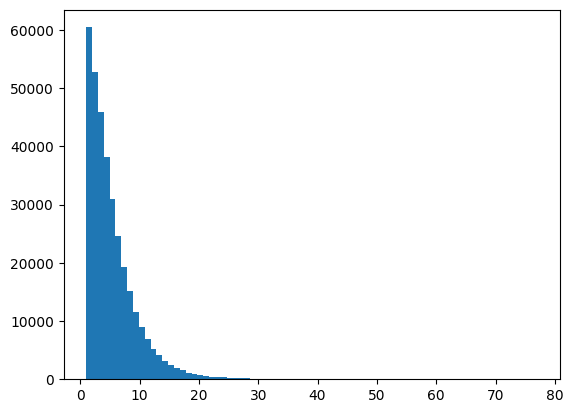

In [ ]:
from matplotlib import pyplot as plt
plt.hist(temp, bins=77)

In [ ]:
from collections import Counter
import numpy as np
a = Counter(np.array(temp).flatten())
print(max(a))
print(a)

77
Counter({1: 60458, 2: 52737, 3: 45966, 4: 38159, 5: 30886, 6: 24588, 7: 19216, 8: 15085, 9: 11627, 10: 9063, 11: 6854, 12: 5214, 13: 4099, 14: 3206, 15: 2385, 16: 1876, 17: 1518, 18: 1129, 19: 929, 20: 736, 21: 581, 22: 462, 23: 351, 24: 320, 25: 242, 26: 198, 27: 169, 28: 134, 29: 127, 30: 88, 32: 66, 31: 59, 33: 50, 34: 48, 35: 32, 36: 28, 37: 24, 41: 18, 39: 16, 40: 16, 43: 14, 38: 14, 44: 12, 42: 10, 50: 5, 46: 4, 47: 4, 54: 4, 60: 3, 52: 3, 58: 2, 55: 2, 61: 2, 59: 2, 49: 2, 62: 2, 64: 2, 66: 1, 72: 1, 77: 1, 63: 1, 67: 1, 68: 1, 73: 1, 51: 1, 45: 1, 53: 1})


### Additional investigation of Installments table

In [ ]:
d.keys()

dict_keys(['bureau_balance', 'application_test', 'application_train', 'previous_application', 'sample_submission', 'bureau', 'HomeCredit_columns_description', 'credit_card_balance', 'POS_CASH_balance', 'installments_payments'])

In [ ]:
d['previous_application']['CODE_REJECT_REASON'].head(5)

0    XAP
1    XAP
2    XAP
3    XAP
4     HC
Name: CODE_REJECT_REASON, dtype: object

In [ ]:
d['previous_application'][(d['previous_application']['CODE_REJECT_REASON'] != 'XAP') & (d['previous_application']['CODE_REJECT_REASON'] != 'HC')]['CODE_REJECT_REASON'].head(10)

36      LIMIT
41     CLIENT
54      LIMIT
80      SCOFR
85      SCOFR
97     CLIENT
98     CLIENT
152    CLIENT
153       SCO
163     LIMIT
Name: CODE_REJECT_REASON, dtype: object

In [ ]:
d['installments_payments'].sort_values(by=['SK_ID_PREV']).head(30)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
512588,1000001,158271,1.0,1,-268.0,-294.0,6404.310,6404.310
2159480,1000001,158271,2.0,2,-238.0,-244.0,62039.115,62039.115
3411021,1000002,101962,1.0,3,-1540.0,-1559.0,6264.000,6264.000
1214732,1000002,101962,1.0,1,-1600.0,-1611.0,6264.000,6264.000
1006868,1000002,101962,2.0,4,-1510.0,-1554.0,18443.565,18443.565
1631862,1000002,101962,1.0,2,-1570.0,-1575.0,6264.000,6264.000
7054246,1000003,252457,1.0,2,-64.0,-81.0,4951.350,4951.350
6145031,1000003,252457,1.0,1,-94.0,-108.0,4951.350,4951.350
4279518,1000003,252457,1.0,3,-34.0,-49.0,4951.350,4951.350
5197652,1000004,260094,1.0,5,-742.0,-752.0,3391.110,3391.110


from matplotlib import pyplot as plt
_df_0['SK_ID_PREV'].plot(kind='hist', bins=20, title='SK_ID_PREV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SK_ID_CURR'].plot(kind='hist', bins=20, title='SK_ID_CURR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['NUM_INSTALMENT_VERSION'].plot(kind='hist', bins=20, title='NUM_INSTALMENT_VERSION')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['NUM_INSTALMENT_NUMBER'].plot(kind='hist', bins=20, title='NUM_INSTALMENT_NUMBER')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='SK_ID_PREV', y='SK_ID_CURR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='SK_ID_CURR', y='NUM_INSTALMENT_VERSION', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='NUM_INSTALMENT_VERSION', y='NUM_INSTALMENT_NUMBER', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='NUM_INSTALMENT_NUMBER', y='DAYS_INSTALMENT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SK_ID_PREV']
  ys = series['SK_ID_CURR']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('SK_ID_PREV', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_PREV')
_ = plt.ylabel('SK_ID_CURR')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SK_ID_PREV']
  ys = series['NUM_INSTALMENT_VERSION']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('SK_ID_PREV', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_PREV')
_ = plt.ylabel('NUM_INSTALMENT_VERSION')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SK_ID_PREV']
  ys = series['NUM_INSTALMENT_NUMBER']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('SK_ID_PREV', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_PREV')
_ = plt.ylabel('NUM_INSTALMENT_NUMBER')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SK_ID_PREV']
  ys = series['DAYS_INSTALMENT']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('SK_ID_PREV', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SK_ID_PREV')
_ = plt.ylabel('DAYS_INSTALMENT')

from matplotlib import pyplot as plt
_df_12['SK_ID_PREV'].plot(kind='line', figsize=(8, 4), title='SK_ID_PREV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['SK_ID_CURR'].plot(kind='line', figsize=(8, 4), title='SK_ID_CURR')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['NUM_INSTALMENT_VERSION'].plot(kind='line', figsize=(8, 4), title='NUM_INSTALMENT_VERSION')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['NUM_INSTALMENT_NUMBER'].plot(kind='line', figsize=(8, 4), title='NUM_INSTALMENT_NUMBER')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
d['installments_payments']['late'] = d['installments_payments']['DAYS_INSTALMENT'] < d['installments_payments']['DAYS_ENTRY_PAYMENT']

In [ ]:
percentage_late_payments = d['installments_payments'].groupby('SK_ID_PREV')['late'].mean() * 100
print(percentage_late_payments)


SK_ID_PREV
1000001     0.000000
1000002     0.000000
1000003     0.000000
1000004     0.000000
1000005    18.181818
             ...    
2843495    14.285714
2843496     0.000000
2843497     0.000000
2843498     0.000000
2843499     0.000000
Name: late, Length: 997752, dtype: float64
